In [1]:
import pandas as pd 
import rasterio
import matplotlib.pyplot as plt
from lxml import etree

In [ ]:
# import copernicusmarine

# copernicusmarine.subset(
#   dataset_id="cmems_mod_glo_wav_anfc_0.083deg_PT3H-i",
#   dataset_version="202411",
#   variables=["VMDR"],
#   minimum_longitude=-10.102329,
#   maximum_longitude=-10.102329,
#   minimum_latitude=39.979985,
#   maximum_latitude=39.979985,
#   start_datetime="2025-05-25T12:00:00",
#   end_datetime="2025-06-25T12:00:00",
#   coordinates_selection_method="strict-inside",
#   netcdf_compression_level=1,
#   disable_progress_bar=True,
# )

INFO - 2025-06-24T09:25:02Z - Downloading Copernicus Marine data requires a Copernicus Marine username and password, sign up for free at: https://data.marine.copernicus.eu/register


Copernicus Marine username:Copernicus Marine username:Copernicus Marine password:

INFO - 2025-06-24T09:26:25Z - Selected dataset version: "202411"
INFO - 2025-06-24T09:26:25Z - Selected dataset part: "default"
INFO - 2025-06-24T09:26:35Z - Starting download. Please wait...
INFO - 2025-06-24T09:26:35Z - NetCDF compression enabled with level 1
INFO - 2025-06-24T09:26:37Z - Successfully downloaded to cmems_mod_glo_wav_anfc_0.083deg_PT3H-i_VMDR_10.08W_40.00N_2025-05-25-2025-06-25.nc


ResponseSubset(file_path=PosixPath('cmems_mod_glo_wav_anfc_0.083deg_PT3H-i_VMDR_10.08W_40.00N_2025-05-25-2025-06-25.nc'), output_directory=PosixPath('.'), filename='cmems_mod_glo_wav_anfc_0.083deg_PT3H-i_VMDR_10.08W_40.00N_2025-05-25-2025-06-25.nc', file_size=0.013475190839694656, data_transfer_size=4.627541984732824, variables=['VMDR'], coordinates_extent=[GeographicalExtent(minimum=-10.083333333333343, maximum=-10.083333333333343, unit='degrees_east', coordinate_id='longitude'), GeographicalExtent(minimum=40.0, maximum=40.0, unit='degrees_north', coordinate_id='latitude'), TimeExtent(minimum='2025-05-25T12:00:00+00:00', maximum='2025-06-25T12:00:00+00:00', unit='iso8601', coordinate_id='time')], status='000', message='The request was successful.', file_status='DOWNLOADED')

In [3]:
from netCDF4 import Dataset

# Open the .nc file
ds = Dataset("cmems_mod_glo_wav_anfc_0.083deg_PT3H-i_VMDR_10.08W_40.00N_2025-05-25-2025-06-25.nc")

# View metadata
print(ds)

# List all variables
print(ds.variables.keys())

# Access a variable
# vm_direction = ds.variables['VMDR'][:]
# print(vm_direction)

FileNotFoundError: [Errno 2] No such file or directory: 'cmems_mod_glo_wav_anfc_0.083deg_PT3H-i_VMDR_10.08W_40.00N_2025-05-25-2025-06-25.nc'

In [53]:
ds.info() # Get detailed information about the dataset

AttributeError: NetCDF: Attribute not found

In [34]:
import numpy as np
from datetime import datetime, timedelta

# Extract values
lat = ds.variables['latitude'][:]
lon = ds.variables['longitude'][:]
time = ds.variables['time'][:]        # Usually in hours since a reference
vmdr = ds.variables['VMDR'][:]        # Shape: (time, lat, lon)

In [50]:
print(vmdr.shape)

(249, 1, 1)


In [51]:
print(vmdr)

[[[333.14999658]]

 [[327.98999669]]

 [[326.85999672]]

 [[324.72999677]]

 [[323.94999678]]

 [[325.07999676]]

 [[327.94999669]]

 [[331.66999661]]

 [[334.75999654]]

 [[337.69999648]]

 [[339.93999643]]

 [[340.8499964 ]]

 [[342.29999637]]

 [[342.20999637]]

 [[340.03999642]]

 [[338.09999647]]

 [[336.7999965 ]]

 [[335.55999652]]

 [[334.25999655]]

 [[333.39999657]]

 [[333.53999657]]

 [[334.25999655]]

 [[334.10999656]]

 [[333.77999656]]

 [[333.50999657]]

 [[331.9199966 ]]

 [[329.55999666]]

 [[327.6499967 ]]

 [[326.26999673]]

 [[324.96999676]]

 [[323.2399968 ]]

 [[321.27999684]]

 [[319.59999688]]

 [[319.17999689]]

 [[318.24999691]]

 [[319.30999689]]

 [[320.21999687]]

 [[320.30999686]]

 [[320.07999687]]

 [[320.38999686]]

 [[320.43999686]]

 [[321.00999685]]

 [[323.0199968 ]]

 [[324.13999678]]

 [[326.41999673]]

 [[326.71999672]]

 [[326.70999672]]

 [[325.62999674]]

 [[322.9699968 ]]

 [[322.13999682]]

 [[323.2999968 ]]

 [[326.68999672]]

 [[331.23999

In [39]:
print(time)

[cftime.DatetimeGregorian(2025, 5, 25, 12, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(2025, 5, 25, 15, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(2025, 5, 25, 18, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(2025, 5, 25, 21, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(2025, 5, 26, 0, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(2025, 5, 26, 3, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(2025, 5, 26, 6, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(2025, 5, 26, 9, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(2025, 5, 26, 12, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(2025, 5, 26, 15, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(2025, 5, 26, 18, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(2025, 5, 26, 21, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(2025, 5, 27, 0, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(2025, 5, 27, 3, 0, 0, 0, has_y

In [41]:
import pandas as pd

# Convert cftime objects to regular Python datetime
time_converted = [t.datetime for t in time]  # Convert each to datetime.datetime

# Create a DataFrame
df = pd.DataFrame({
    "time": time_converted,
    "VMDR": vmdr_flat
})

print(df.head())

AttributeError: 'cftime._cftime.DatetimeGregorian' object has no attribute 'datetime'

In [40]:
# Read time units (e.g., 'hours since 1900-01-01 00:00:00.0')
time_units = ds.variables['time'].units
time_calendar = ds.variables['time'].calendar if 'calendar' in ds.variables['time'].ncattrs() else 'standard'

from netCDF4 import num2date
time = num2date(time, units=time_units, calendar=time_calendar)

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'cftime._cftime.DatetimeGregorian'

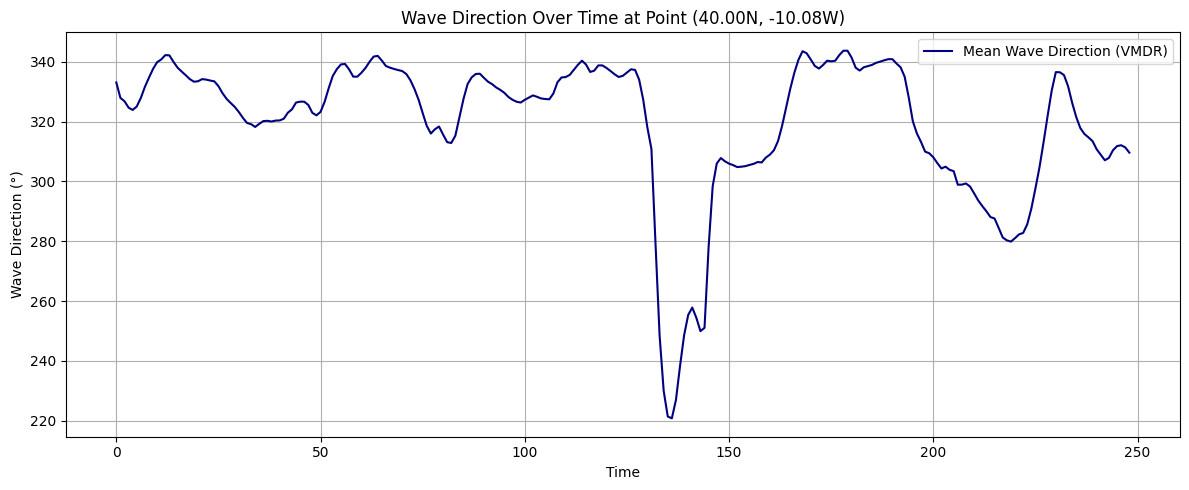

In [47]:
import matplotlib.pyplot as plt

# Flatten VMDR if needed
vmdr_flat = vmdr[:, 0, 0]  # adjust indices depending on shape

plt.figure(figsize=(12, 5))
plt.plot(vmdr_flat, label="Mean Wave Direction (VMDR)", color='navy')
plt.xlabel('Time')
plt.ylabel('Wave Direction (°)')
plt.title('Wave Direction Over Time at Point ({:.2f}N, {:.2f}W)'.format(lat[0], lon[0]))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [54]:
import copernicusmarine

copernicusmarine.subset(
  dataset_id="cmems_mod_glo_wav_anfc_0.083deg_PT3H-i",
  dataset_version="202411",
  variables=["VMDR"],
  minimum_longitude=-11.084738,
  maximum_longitude=-9.269973,
  minimum_latitude=37.971742,
  maximum_latitude=40.205483,
  start_datetime="2025-04-25T00:00:00",
  end_datetime="2025-06-25T12:00:00",
  coordinates_selection_method="strict-inside",
  netcdf_compression_level=1,
  disable_progress_bar=True,
)

INFO - 2025-06-24T14:41:41Z - Downloading Copernicus Marine data requires a Copernicus Marine username and password, sign up for free at: https://data.marine.copernicus.eu/register


Copernicus Marine username:Copernicus Marine password:

INFO - 2025-06-24T14:42:02Z - Selected dataset version: "202411"
INFO - 2025-06-24T14:42:02Z - Selected dataset part: "default"
INFO - 2025-06-24T14:42:08Z - Starting download. Please wait...
INFO - 2025-06-24T14:42:08Z - NetCDF compression enabled with level 1
INFO - 2025-06-24T14:42:14Z - Successfully downloaded to cmems_mod_glo_wav_anfc_0.083deg_PT3H-i_VMDR_11.08W-9.33W_38.00N-40.17N_2025-04-25-2025-06-25.nc


ResponseSubset(file_path=PosixPath('cmems_mod_glo_wav_anfc_0.083deg_PT3H-i_VMDR_11.08W-9.33W_38.00N-40.17N_2025-04-25-2025-06-25.nc'), output_directory=PosixPath('.'), filename='cmems_mod_glo_wav_anfc_0.083deg_PT3H-i_VMDR_11.08W-9.33W_38.00N-40.17N_2025-04-25-2025-06-25.nc', file_size=0.5718587786259542, data_transfer_size=27.765251908396948, variables=['VMDR'], coordinates_extent=[GeographicalExtent(minimum=-11.083333333333343, maximum=-9.333333333333343, unit='degrees_east', coordinate_id='longitude'), GeographicalExtent(minimum=38.0, maximum=40.16666666666666, unit='degrees_north', coordinate_id='latitude'), TimeExtent(minimum='2025-04-25T00:00:00+00:00', maximum='2025-06-25T12:00:00+00:00', unit='iso8601', coordinate_id='time')], status='000', message='The request was successful.', file_status='DOWNLOADED')

In [58]:
from netCDF4 import Dataset

# Open the .nc file
ds1 = Dataset("/Users/hritik/Documents/Project /Wave Prediction/cmems_mod_glo_wav_anfc_0.083deg_PT3H-i_VMDR_11.08W-9.33W_38.00N-40.17N_2025-04-25-2025-06-25.nc")

# View metadata
print(ds1)

# List all variables
print(ds1.variables.keys())

# Access a variable
vm_direction1 = ds1.variables['VMDR'][:]
print(vm_direction1)

<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.6
    references: http://marine.copernicus.eu
    contact: servicedesk.cmems@mercator-ocean.eu
    credit: E.U. Copernicus Marine Service Information (CMEMS)
    producer: CMEMS - Global Monitoring and Forecasting Centre
    institution: METEO-FRANCE
    copernicusmarine_version: 2.1.2
    dimensions(sizes): time(493), latitude(27), longitude(22)
    variables(dimensions): int16 VMDR(time, latitude, longitude), float64 latitude(latitude), float64 longitude(longitude), int32 time(time)
    groups: 
dict_keys(['VMDR', 'latitude', 'longitude', 'time'])
[[[312.88999702967703 313.15999702364206 313.26999702118337 ...
   312.25999704375863 310.92999707348645 308.8999971188605]
  [312.17999704554677 312.47999703884125 312.65999703481793 ...
   311.60999705828726 310.2599970884621 307.729997145012]
  [311.43999706208706 311.77999705448747 311.9999970495701 ...
   310.8499970752746 309.30999710969

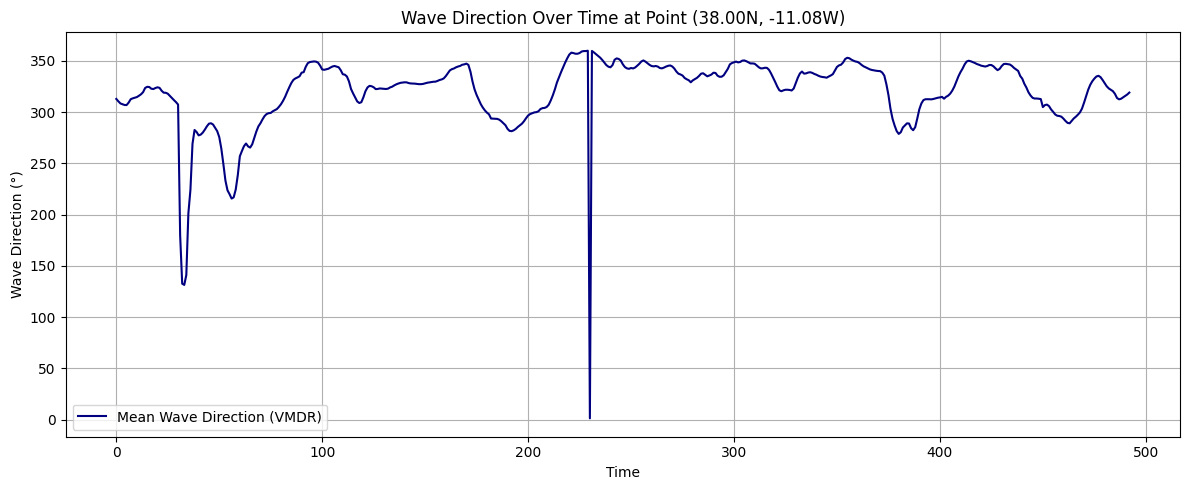

In [59]:
lat = ds1.variables['latitude'][:]
lon = ds1.variables['longitude'][:]
time = ds1.variables['time'][:]        # Usually in hours since a reference
vmdr1 = ds1.variables['VMDR'][:]  

vmdr_flat = vmdr1[:, 0, 0]  # adjust indices depending on shape

plt.figure(figsize=(12, 5))
plt.plot(vmdr_flat, label="Mean Wave Direction (VMDR)", color='navy')
plt.xlabel('Time')
plt.ylabel('Wave Direction (°)')
plt.title('Wave Direction Over Time at Point ({:.2f}N, {:.2f}W)'.format(lat[0], lon[0]))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

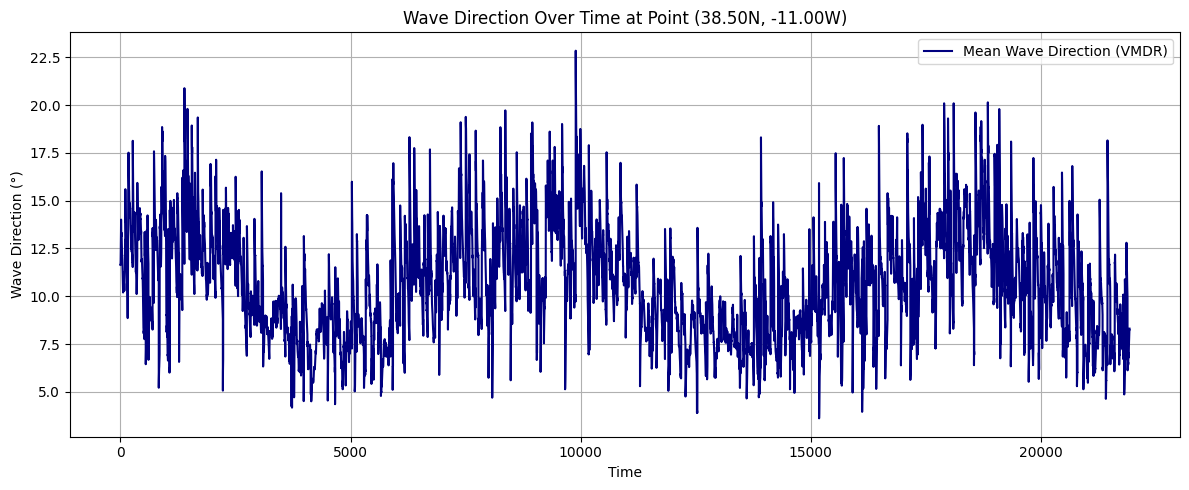

In [7]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt

# Open the .nc file
ds2 = Dataset("/Users/hritik/Documents/Project /Wave-Prediction/cmems_mod_ibi_wav_anfc_0.027deg_PT1H-i_1751475467150.nc")

lat = ds2.variables['latitude'][:]
lon = ds2.variables['longitude'][:]
time = ds2.variables['time'][:]        # Usually in hours since a reference
vtpk = ds2.variables['VTPK'][:]  

vmdr_flat = vtpk[:, 0, 0]  # adjust indices depending on shape

plt.figure(figsize=(12, 5))
plt.plot(vmdr_flat, label="Mean Wave Direction (VMDR)", color='navy')
plt.xlabel('Time')
plt.ylabel('Wave Direction (°)')
plt.title('Wave Direction Over Time at Point ({:.2f}N, {:.2f}W)'.format(lat[0], lon[0]))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [9]:
print(ds2.variables.keys())

dict_keys(['time', 'latitude', 'longitude', 'VTPK'])


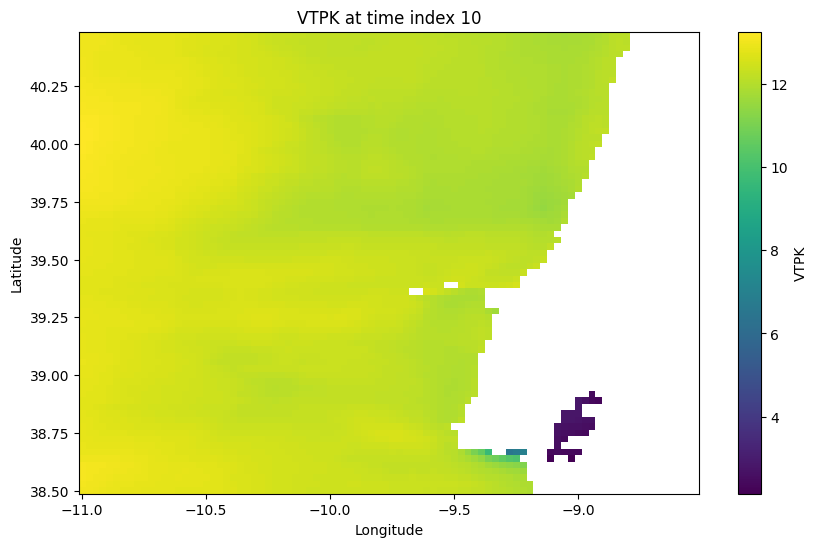

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc

lat = ds2.variables['latitude'][:]
lon = ds2.variables['longitude'][:]
time = ds2.variables['time'][:]
vtpk = ds2.variables['VTPK'][:]   # assume shape is (time, lat, lon)

# Choose the timestep you want to plot
t_index = 10

# vtpk at first timestep
vtpk_t0 = vtpk[t_index, :, :]

# Make a plot
plt.figure(figsize=(10, 6))
plt.pcolormesh(lon, lat, vtpk_t0, shading='auto')
plt.colorbar(label='VTPK')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'VTPK at time index {t_index}')
plt.show()

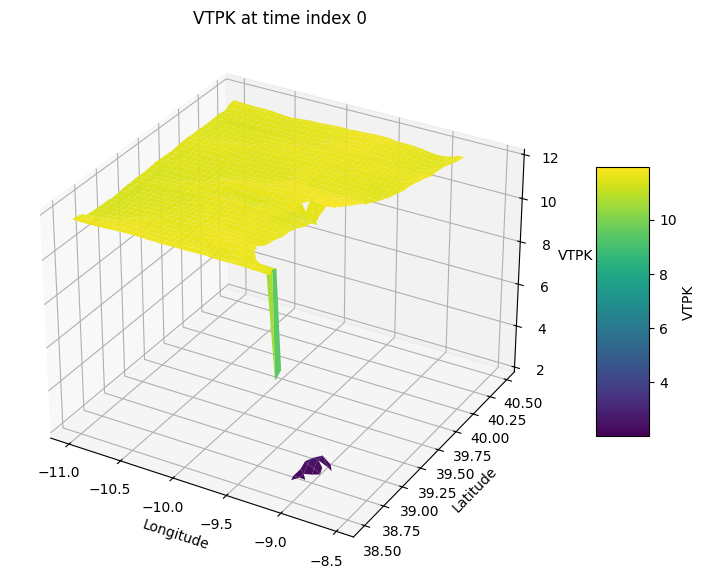

In [18]:
from mpl_toolkits.mplot3d import Axes3D
# Choose timestep
t_index = 0

# VTPK at t_index
vtpk_t0 = vtpk[t_index, :, :]   # shape (nlat, nlon)

# Create meshgrid for lat and lon
Lon, Lat = np.meshgrid(lon, lat)

# Plot
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot surface
surf = ax.plot_surface(Lon, Lat, vtpk_t0, cmap='viridis', edgecolor='none')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('VTPK')
ax.set_title(f'VTPK at time index {t_index}')
fig.colorbar(surf, shrink=0.5, aspect=5, label='VTPK')

plt.show()


WAve height

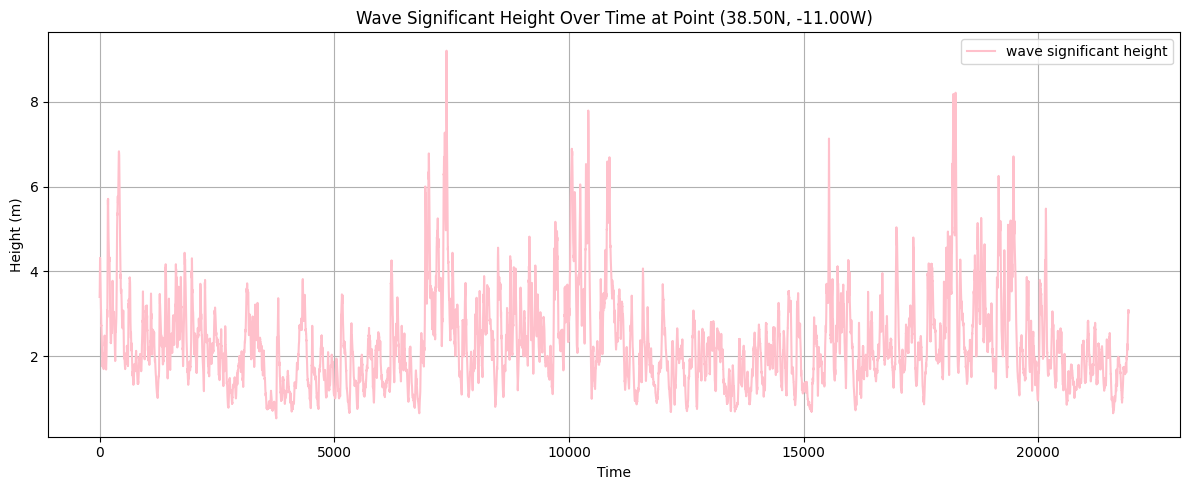

In [6]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt

# Open the .nc file
ds_height = Dataset("/Users/hritik/Documents/Project /Wave-Prediction/cmems_mod_ibi_wav_anfc_0.027deg_PT1H-i_1751479183632.nc")

lat = ds_height.variables['latitude'][:]
lon = ds_height.variables['longitude'][:]
time = ds_height.variables['time'][:]        # Usually in hours since a reference
vhmo = ds_height.variables['VHM0'][:]  

vhmo_flat = vhmo[:, 0, 0]  # adjust indices depending on shape

plt.figure(figsize=(12, 5))
plt.plot(vhmo_flat, label="wave significant height", color='pink')
plt.xlabel('Time')
plt.ylabel('Height (m)')
plt.title('Wave Significant Height Over Time at Point ({:.2f}N, {:.2f}W)'.format(lat[0], lon[0]))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

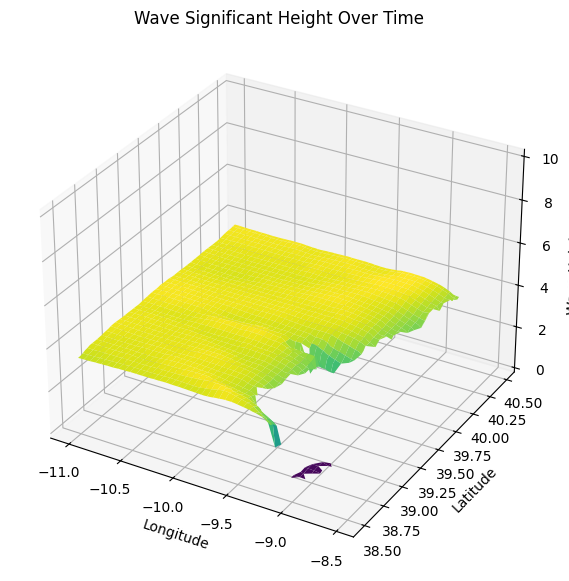

In [2]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from mpl_toolkits.mplot3d import Axes3D

# Load data
ds_height = Dataset("/Users/hritik/Documents/Project /Wave-Prediction/cmems_mod_ibi_wav_anfc_0.027deg_PT1H-i_1751479183632.nc")
lat = ds_height.variables['latitude'][:]
lon = ds_height.variables['longitude'][:]
time = ds_height.variables['time'][:]
vhmo = ds_height.variables['VHM0'][:]

# Meshgrid
Lon, Lat = np.meshgrid(lon, lat)

# Choose interval to downsample frames
interval = 100
frames = list(range(0, len(time), interval))  # e.g., [0, 100, 200, ..., 20900]

# Create figure and axis
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection='3d')
zmin, zmax = np.nanmin(vhmo), np.nanmax(vhmo)
ax.set_zlim(zmin, zmax)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Wave Height (m)')

# Initial surface
surf = ax.plot_surface(Lon, Lat, vhmo[0, :, :], cmap='viridis', edgecolor='none')
ax.set_title('Wave Significant Height Over Time')

# Update function
def update(frame_idx):
    global surf
    surf.remove()
    data = vhmo[frame_idx, :, :]
    surf = ax.plot_surface(Lon, Lat, data, cmap='viridis', edgecolor='none')
    ax.set_title(f'Wave Significant Height at time index {frame_idx}')
    return surf,

# Create animation (fps=10 → ~21 sec)
anim = FuncAnimation(fig, update, frames=frames, interval=100)

plt.show()

# Save as GIF
anim.save('wave_height_animation.gif', writer=PillowWriter(fps=10))


In [1]:
import copernicusmarine

copernicusmarine.subset(
  dataset_id="cmems_mod_ibi_wav_my-aflux_0.027deg_P1H-i",
  dataset_version="202411",
  variables=["TLA", "TAUX", "TAUY"],
  minimum_longitude=-11,
  maximum_longitude=-8.5,
  minimum_latitude=38.5,
  maximum_latitude=40.5,
  start_datetime="2020-01-01T00:00:00",
  end_datetime="2023-12-30T23:00:00",
  coordinates_selection_method="strict-inside",
  netcdf_compression_level=1,
  disable_progress_bar=True,
)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
INFO - 2025-08-19T05:07:53Z - Downloading Copernicus Marine data requires a Copernicus Marine username and password, sign up for free at: https://data.marine.copernicus.eu/register


Copernicus Marine username:Copernicus Marine password:

INFO - 2025-08-19T05:08:10Z - Selected dataset version: "202411"
INFO - 2025-08-19T05:08:10Z - Selected dataset part: "default"
INFO - 2025-08-19T05:08:18Z - Starting download. Please wait...
INFO - 2025-08-19T05:08:18Z - NetCDF compression enabled with level 1
INFO - 2025-08-19T05:31:46Z - Successfully downloaded to cmems_mod_ibi_wav_my-aflux_0.027deg_P1H-i_TLA-TAUX-TAUY_11.00W-8.53W_38.50N-40.47N_2020-01-01-2023-12-30.nc


ResponseSubset(file_path=PosixPath('cmems_mod_ibi_wav_my-aflux_0.027deg_P1H-i_TLA-TAUX-TAUY_11.00W-8.53W_38.50N-40.47N_2020-01-01-2023-12-30.nc'), output_directory=PosixPath('.'), filename='cmems_mod_ibi_wav_my-aflux_0.027deg_P1H-i_TLA-TAUX-TAUY_11.00W-8.53W_38.50N-40.47N_2020-01-01-2023-12-30.nc', file_size=1299.970251908397, data_transfer_size=12082.677251908397, variables=['TLA', 'TAUX', 'TAUY'], coordinates_extent=[GeographicalExtent(minimum=-10.999754905700684, maximum=-8.527456283569336, unit='degrees_east', coordinate_id='longitude'), GeographicalExtent(minimum=38.50038528442383, maximum=40.4726676940918, unit='degrees_north', coordinate_id='latitude'), TimeExtent(minimum='2020-01-01T00:00:00+00:00', maximum='2023-12-30T23:00:00+00:00', unit='iso8601', coordinate_id='time')], status='000', message='The request was successful.', file_status='DOWNLOADED')

In [4]:
from netCDF4 import Dataset
ds_new = Dataset("cmems_mod_ibi_wav_my-aflux_0.027deg_P1H-i_TLA-TAUX-TAUY_11.00W-8.53W_38.50N-40.47N_2020-01-01-2023-12-30.nc")
print(ds_new.variables.keys())


dict_keys(['TLA', 'TAUX', 'TAUY', 'latitude', 'longitude', 'time'])


In [5]:
print(ds_new.variables['TLA'].shape)  # Total wave energy flux

(35040, 72, 90)


In [ ]:
# TAUX     -Surface downward eastward stress due to ocean viscous dissipation
# TAUY     -Surface downward northward stress due to ocean viscous dissipation
# TLA      -Wave mixing energy flux into sea water